## Lab for K-Means clustering

#### Motivation
In this lab, you will apply K-Means clustering to an unlabeled dataset derived from the Breast Cancer Wisconsin Diagnostic dataset. This lab focuses on using clustering to group data points and evaluate the effectiveness of the clusters.

#### By completing the steps, you will:

* Prepare the dataset for clustering.
* Determine the optimal number of clusters using the Elbow Method.
* Perform K-Means clustering and evaluate its quality using the Silhouette Score.
* Visualize clusters using Principal Component Analysis (PCA).
* Compare predicted clusters to actual labels to assess model effectiveness.

### Step 0: Load and Prepare the Dataset (Provided)

The code for this step is already given to you. It performs the following:

* Imports necessary libraries such as pandas, numpy, matplotlib, seaborn, sklearn.cluster.KMeans, and others.
* Loads the Breast Cancer dataset from sklearn.datasets.load_breast_cancer().
* Creates a DataFrame containing the features.
* Removes the labels from the dataset, as clustering is an unsupervised learning task.


No modifications are needed for this step.

In [1]:
# CodeGrade step0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer


In [2]:
# CodeGrade step0

# Load dataset
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Remove labels (unsupervised learning)
df_unlabeled = df.copy()


### Step 1: Rescale the Data
Objective: Standardize the dataset before applying K-Means.

Instructions
* Use StandardScaler from sklearn.preprocessing to normalize all features.
* Fit the scaler to the dataset and transform it into a new variable called df_scaled.
* Ensure that df_scaled retains the same shape as the original data.

In [3]:
# CodeGrade step1

# Rescale
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Shape
df_scaled.shape # accidently set it equal earlier, my bad.

(569, 30)

### Step 2: Determine the Optimal Number of Clusters (Elbow Method)

Objective: Use the Elbow Method to identify the best value for K.

Instructions
* Initialize an empty list wcss (Within-Cluster Sum of Squares).
* Loop over values of K from 1 to 9:
  * Train a KMeans model with the current k, random_state=42, and n_init=10.
  * Fit the model to df_scaled and store the inertia (WCSS) in wcss.
* Calculate and return the mean WCSS.


In [6]:
# CodeGrade step2

# WCSS
wcss = [] # Initialize and empty list to store within-cluster sum of squares which is WCSS for each k below

# for loop : looping through each k values from 1 to 9 (remember how numbers work)
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Mean of WCSS : Calcul and return the mean of all WCSS valeus 
np.mean(wcss)

9571.945762124911

Plot the Elbow Method graph:
* X-axis: Number of clusters (K).
* Y-axis: WCSS values.
* Use markers ('o') and a line ('-').

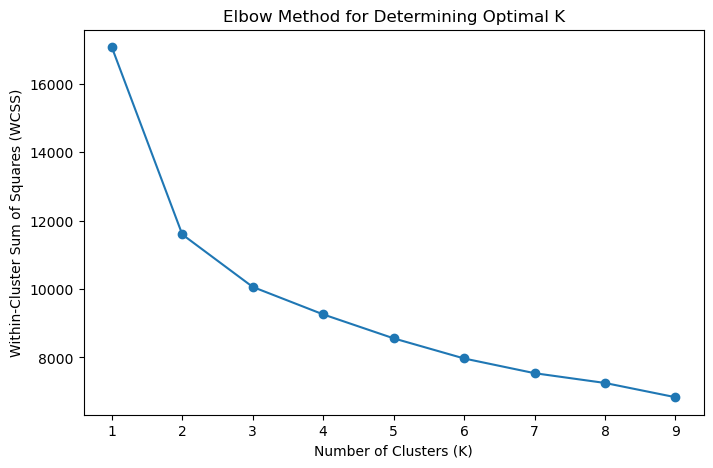

In [8]:
# Plot Elbow Method
# Start by creating a figure and axis
plt.figure(figsize = (8, 5))

# Plot WCSS values for each K using circles and connect them with a line
plt.plot(range(1, 10), wcss, marker = "o", linestyle = "-")

# now add the labels and title to the chart
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Determining Optimal K")

# Display the plot
plt.show()


### Step 3: Perform K-Means Clustering

Objective: Apply K-Means clustering using the best K from the Elbow Method.

Instructions
* Set optimal_k (determined from the previous step).
* Train a KMeans model with optimal_k, random_state=42, and n_init=10.
* Assign cluster labels to df_unlabeled["Cluster"].
* Compute the Silhouette Score to measure clustering quality.
* Return the Silhouette Score rounded to 4 decimal places.


In [10]:
# CodeGrade step3

# Optimal k
optimal_k = 2

# lets create and fit the KMeans model
kmeans = KMeans(n_clusters = optimal_k, random_state = 42, n_init = 10)
kmeans.fit(df_scaled)

# Assigning the predicted cluster labels to the dataframe
df_unlabeled["Cluster"] = kmeans.labels_

# Silhouette Average
# This will measure how well each point fits within its cluster (higher = better)
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)

# Round
round(silhouette_avg, 4)

0.3434

### Step 4: Visualize Clusters with PCA
Objective: Reduce dimensions and visualize the clusters.

Instructions
* Apply PCA (Principal Component Analysis) to reduce df_scaled to two dimensions (n_components=2).
* Store the transformed dataset in df_pca.
* Return the maximum absolute value in df_pca, rounded to 0 decimal places.

In [11]:
# CodeGrade step4

# PCA
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_scaled)

# Max pca
# Return the mex absolute value in df_pca (rounded to 0 decimal places)
round(np.max(np.abs(df_pca)), 0) # debug here if issues

16.0

Create a scatter plot of the two PCA components:
* X-axis: Principal Component 1.
* Y-axis: Principal Component 2.
* Color the points based on their assigned cluster.
* Use cmap='viridis', marker 'o', and edgecolor='k'.
* Add a color bar for cluster labels.

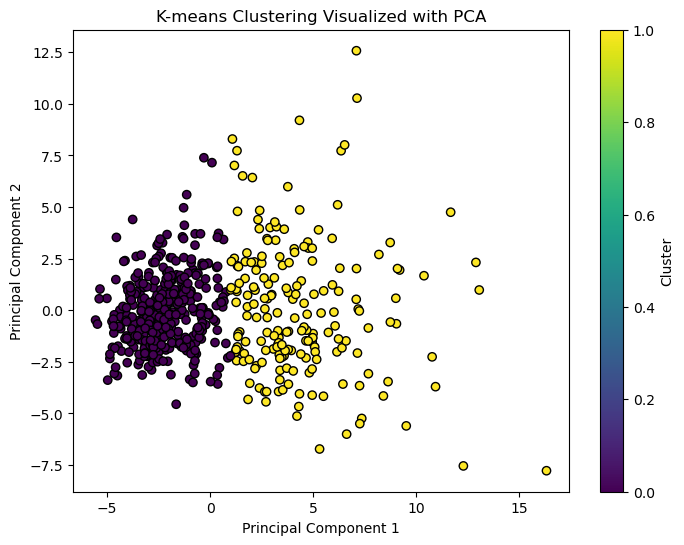

In [13]:
# Scatter plot


# Create the figure
plt.figure(figsize = (8, 6))

# Create scatter plot
# x = first princ comp, y = sec prince comp
# color = cluster label from df_unlabeled["Cluster"]

plt.scatter(
    df_pca[:, 0], # Prince Comp 1
    df_pca[:, 1], # Prince Comp 2
    c = df_unlabeled["Cluster"], # Cluster assignments
    cmap = "viridis", # Color map
    marker = "o",
    edgecolor = "k" # sets the border for each point as black
)

# Label time
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering Visualized with PCA")

# add color bar to show cluster labels
plt.colorbar(label = "Cluster")

# Show the plot
plt.show()

### Step 5: Compare Clusters to Actual Labels
Objective: Compare predicted clusters to the actual class labels.

Instructions
* Create a new column in df called "Predicted_Cluster" and assign it the cluster labels.
* Add a column "Actual_Label" using cancer.target, where:
  * 0 = Malignant
  * 1 = Benign
* Print the value counts of the unique combinations of "Actual_Label" and "Predicted_Cluster", returning its shape.

In [17]:
# CodeGrade step5

# Clusters
# Assigned predicted clusters from df_unlabeled
df["Predicted_Cluster"] = df_unlabeled["Cluster"]

# Assign actual labels from the cancer dataset
df["Actual_Label"] = cancer.target

# Return cluster comparison: Counts of each actaul_label vs predicted_cluster
df.groupby(["Actual_Label", "Predicted_Cluster"]).size()

# Return cluster camparison as shape
df.groupby(["Actual_Label", "Predicted_Cluster"]).size().shape

(4,)